Colour ℓ1-TV Denoising (CuPy Version)
=====================================

This example demonstrates the use of class [tvl1.TVL1Denoise](http://sporco.rtfd.org/en/latest/modules/sporco.admm.tvl1.html#sporco.admm.tvl1.TVL1Denoise) for removing salt & pepper noise from a colour image using Total Variation regularization with an ℓ1 data fidelity term (ℓ1-TV denoising). This variant of the example uses the GPU accelerated version of [tvl1](http://sporco.rtfd.org/en/latest/modules/sporco.admm.tvl1.html#module-sporco.admm.tvl1) within the [sporco.cupy](http://sporco.rtfd.org/en/latest/modules/sporco.cupy.html#module-sporco.cupy) subpackage.

In [1]:
from __future__ import print_function
from builtins import input

import numpy as np

from sporco import util
from sporco import signal
from sporco import metric
from sporco import plot
plot.config_notebook_plotting()
from sporco.cupy import (cupy_enabled, np2cp, cp2np, select_device_by_load,
                         gpu_info)
from sporco.cupy.admm import tvl1

Load reference image.

In [2]:
img = util.ExampleImages().image('monarch.png', scaled=True,
                                 idxexp=np.s_[:,160:672])

Construct test image corrupted by 20% salt & pepper noise.

In [3]:
np.random.seed(12345)
imgn = signal.spnoise(img, 0.2)

Set regularization parameter and options for ℓ1-TV denoising solver. The regularization parameter used here has been manually selected for good performance.

In [4]:
lmbda = 8e-1
opt = tvl1.TVL1Denoise.Options({'Verbose': True, 'MaxMainIter': 200,
                                'RelStopTol': 5e-3, 'gEvalY': False,
                                'AutoRho': {'Enabled': True}})

Create solver object and solve, returning the the denoised image ``imgr``.

In [5]:
if not cupy_enabled():
    print('CuPy/GPU device not available: running without GPU acceleration\n')
else:
    id = select_device_by_load()
    info = gpu_info()
    if info:
        print('Running on GPU %d (%s)\n' % (id, info[id].name))

b = tvl1.TVL1Denoise(np2cp(imgn), lmbda, opt)
imgr = cp2np(b.solve())

Running on GPU 0 (GeForce RTX 2080 Ti)



Itn   Fnc       DFid      RegTV     r         s         ρ       
----------------------------------------------------------------
   0  1.67e+05  8.07e+04  1.08e+05  3.60e-01  1.29e+00  1.70e+00
   1  1.43e+05  9.34e+04  6.25e+04  2.65e-01  8.24e-01  1.70e+00
   2  1.92e+05  1.18e+05  9.20e+04  2.88e-01  4.24e-01  9.63e-01
   3  1.89e+05  1.29e+05  7.46e+04  2.67e-01  2.65e-01  7.94e-01
   4  1.59e+05  1.14e+05  5.63e+04  1.92e-01  2.94e-01  7.94e-01
   5  1.41e+05  9.96e+04  5.12e+04  1.47e-01  2.03e-01  6.42e-01
   6  1.30e+05  9.28e+04  4.71e+04  1.31e-01  1.09e-01  5.47e-01


   7  1.31e+05  1.01e+05  3.73e+04  1.20e-01  1.01e-01  5.47e-01
   8  1.26e+05  1.00e+05  3.18e+04  9.77e-02  9.09e-02  5.47e-01
   9  1.15e+05  9.11e+04  2.93e+04  7.10e-02  6.81e-02  5.47e-01
  10  1.11e+05  8.86e+04  2.77e+04  5.80e-02  5.52e-02  5.47e-01
  11  1.13e+05  9.20e+04  2.67e+04  5.86e-02  4.44e-02  5.47e-01
  12  1.11e+05  9.01e+04  2.57e+04  5.25e-02  3.74e-02  6.28e-01
  13  1.05e+05  8.59e+04  2.43e+04  3.99e-02  4.06e-02  7.44e-01
  14  1.02e+05  8.39e+04  2.30e+04  3.24e-02  3.73e-02  7.44e-01
  15  1.04e+05  8.54e+04  2.28e+04  3.34e-02  2.62e-02  7.44e-01
  16  1.04e+05  8.56e+04  2.26e+04  3.23e-02  2.12e-02  8.40e-01
  17  1.02e+05  8.42e+04  2.21e+04  2.71e-02  2.73e-02  1.04e+00
  18  1.00e+05  8.29e+04  2.18e+04  2.31e-02  2.71e-02  1.04e+00
  19  1.01e+05  8.32e+04  2.21e+04  2.27e-02  2.04e-02  1.04e+00


  20  1.01e+05  8.35e+04  2.23e+04  2.26e-02  1.57e-02  1.04e+00
  21  1.01e+05  8.29e+04  2.21e+04  2.04e-02  1.83e-02  1.24e+00
  22  9.98e+04  8.24e+04  2.18e+04  1.83e-02  1.91e-02  1.24e+00
  23  9.98e+04  8.24e+04  2.18e+04  1.75e-02  1.60e-02  1.24e+00
  24  9.99e+04  8.25e+04  2.18e+04  1.72e-02  1.29e-02  1.24e+00
  25  9.97e+04  8.24e+04  2.17e+04  1.62e-02  1.36e-02  1.43e+00
  26  9.95e+04  8.21e+04  2.17e+04  1.51e-02  1.40e-02  1.43e+00
  27  9.94e+04  8.21e+04  2.17e+04  1.44e-02  1.26e-02  1.43e+00
  28  9.95e+04  8.21e+04  2.17e+04  1.40e-02  1.08e-02  1.43e+00
  29  9.94e+04  8.20e+04  2.17e+04  1.34e-02  1.09e-02  1.63e+00
  30  9.92e+04  8.19e+04  2.17e+04  1.27e-02  1.17e-02  1.80e+00
  31  9.92e+04  8.18e+04  2.17e+04  1.21e-02  1.13e-02  1.80e+00
  32  9.91e+04  8.18e+04  2.17e+04  1.18e-02  1.02e-02  1.80e+00
  33  9.91e+04  8.18e+04  2.17e+04  1.14e-02  9.40e-03  1.80e+00


  34  9.91e+04  8.17e+04  2.17e+04  1.09e-02  9.62e-03  1.98e+00
  35  9.90e+04  8.17e+04  2.17e+04  1.05e-02  9.41e-03  1.98e+00
  36  9.90e+04  8.17e+04  2.17e+04  1.01e-02  8.80e-03  1.98e+00
  37  9.90e+04  8.16e+04  2.17e+04  9.79e-03  8.26e-03  1.98e+00
  38  9.89e+04  8.16e+04  2.17e+04  9.46e-03  7.88e-03  1.98e+00
  39  9.89e+04  8.16e+04  2.17e+04  9.09e-03  7.99e-03  2.17e+00
  40  9.89e+04  8.16e+04  2.17e+04  8.78e-03  7.79e-03  2.17e+00
  41  9.89e+04  8.15e+04  2.17e+04  8.49e-03  7.38e-03  2.17e+00
  42  9.88e+04  8.15e+04  2.17e+04  8.20e-03  7.02e-03  2.17e+00
  43  9.88e+04  8.15e+04  2.17e+04  7.93e-03  6.72e-03  2.17e+00
  44  9.88e+04  8.15e+04  2.17e+04  7.67e-03  6.44e-03  2.17e+00
  45  9.88e+04  8.15e+04  2.16e+04  7.41e-03  6.16e-03  2.17e+00
  46  9.88e+04  8.14e+04  2.16e+04  7.14e-03  6.24e-03  2.39e+00
  47  9.87e+04  8.14e+04  2.16e+04  6.89e-03  6.12e-03  2.39e+00


  48  9.87e+04  8.14e+04  2.16e+04  6.66e-03  5.90e-03  2.39e+00
  49  9.87e+04  8.14e+04  2.16e+04  6.44e-03  5.66e-03  2.39e+00
  50  9.87e+04  8.14e+04  2.16e+04  6.22e-03  5.42e-03  2.39e+00
  51  9.87e+04  8.14e+04  2.16e+04  6.01e-03  5.19e-03  2.39e+00
  52  9.87e+04  8.14e+04  2.16e+04  5.81e-03  4.97e-03  2.39e+00
  53  9.87e+04  8.14e+04  2.16e+04  5.62e-03  4.77e-03  2.39e+00
  54  9.86e+04  8.13e+04  2.16e+04  5.43e-03  4.60e-03  2.39e+00
  55  9.86e+04  8.13e+04  2.16e+04  5.26e-03  4.42e-03  2.39e+00
  56  9.86e+04  8.13e+04  2.16e+04  5.09e-03  4.26e-03  2.39e+00
  57  9.86e+04  8.13e+04  2.16e+04  4.93e-03  4.10e-03  2.39e+00
----------------------------------------------------------------


Display solve time and denoising performance.

In [6]:
print("TVL1Denoise solve time: %5.2f s" % b.timer.elapsed('solve'))
print("Noisy image PSNR:    %5.2f dB" % metric.psnr(img, imgn))
print("Denoised image PSNR: %5.2f dB" % metric.psnr(img, imgr))

TVL1Denoise solve time:  0.95 s
Noisy image PSNR:    12.02 dB
Denoised image PSNR: 29.29 dB


Display reference, corrupted, and denoised images.

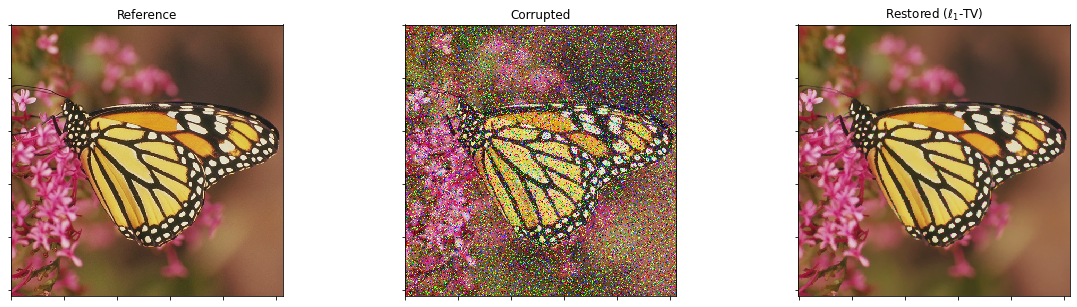

In [7]:
fig = plot.figure(figsize=(20, 5))
plot.subplot(1, 3, 1)
plot.imview(img, title='Reference', fig=fig)
plot.subplot(1, 3, 2)
plot.imview(imgn, title='Corrupted', fig=fig)
plot.subplot(1, 3, 3)
plot.imview(imgr, title=r'Restored ($\ell_1$-TV)', fig=fig)
fig.show()

Get iterations statistics from solver object and plot functional value, ADMM primary and dual residuals, and automatically adjusted ADMM penalty parameter against the iteration number.

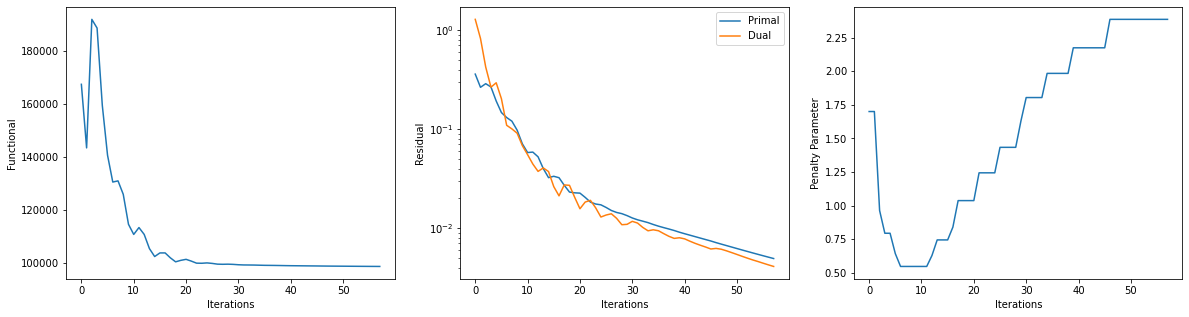

In [8]:
its = b.getitstat()
fig = plot.figure(figsize=(20, 5))
plot.subplot(1, 3, 1)
plot.plot(its.ObjFun, xlbl='Iterations', ylbl='Functional', fig=fig)
plot.subplot(1, 3, 2)
plot.plot(np.vstack((its.PrimalRsdl, its.DualRsdl)).T,
          ptyp='semilogy', xlbl='Iterations', ylbl='Residual',
          lgnd=['Primal', 'Dual'], fig=fig)
plot.subplot(1, 3, 3)
plot.plot(its.Rho, xlbl='Iterations', ylbl='Penalty Parameter', fig=fig)
fig.show()